In [44]:
import pandas as pd
import matplotlib.pyplot as plt

In [102]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
file = 'time_series_19-covid-Confirmed.csv'
df_orig = pd.read_csv(url)
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#    print(df_orig.loc[:, ['Province/State', 'Country/Region', '3/2/20']])

In [109]:
df = df_orig.transpose()
df[:20]

,0,1,2,3,4,5,6,7,8,9,...,245,246,247,248,249,250,251,252,253,254
Province/State,Anhui,Beijing,Chongqing,Fujian,Gansu,Guangdong,Guangxi,Guizhou,Hainan,Hebei,...,"Polk County, GA","Riverside County, CA","Shelby County, TN","Spokane County, WA","St. Louis County, MO","Suffolk County, NY","Ulster County, NY","Unassigned Location, VT","Unknown Location, MA","Volusia County, FL"
Country/Region,Mainland China,Mainland China,Mainland China,Mainland China,Mainland China,Mainland China,Mainland China,Mainland China,Mainland China,Mainland China,...,US,US,US,US,US,US,US,US,US,US
Lat,31.8257,40.1824,30.0572,26.0789,36.0611,23.3417,23.8298,26.8154,19.1959,38.0428,...,34.0132,33.9533,35.1269,47.6587,38.6103,40.9849,41.8586,44.3378,42.4072,29.028
Long,117.226,116.414,107.874,117.987,103.834,113.424,108.788,106.875,109.745,114.515,...,-85.1479,-117.396,-89.9253,-117.422,-90.4125,-72.6151,-74.3118,-72.7563,-71.3824,-81.0755
1/22/20,1,14,6,1,0,26,2,1,4,1,...,0,0,0,0,0,0,0,0,0,0
1/23/20,9,22,9,5,2,32,5,3,5,1,...,0,0,0,0,0,0,0,0,0,0
1/24/20,15,36,27,10,2,53,23,3,8,2,...,0,0,0,0,0,0,0,0,0,0
1/25/20,39,41,57,18,4,78,23,4,19,8,...,0,0,0,0,0,0,0,0,0,0
1/26/20,60,68,75,35,7,111,36,5,22,13,...,0,0,0,0,0,0,0,0,0,0
1/27/20,70,80,110,59,14,151,46,7,33,18,...,0,0,0,0,0,0,0,0,0,0


In [105]:
# df muss die transponierte Matrix sein, d.h. jede Spalte enthält die Fallzahlen für ein Land
# Liefert ein Series der Fallzahlen pro Tag, z.B: data_for_country('South Korea')['1/31/20'] == 11
def series_for_country(country):
    countries = df.loc['Country/Region']
    
    # Komma wandelt index in int  
    index_of_country = countries.index[countries==country]
 
    if index_of_country.empty:
        provinces = df.loc['Province/State']
        index_of_country = provinces.index[provinces==country]
    
    df_country = df[index_of_country]
    if len(df_country.columns)>1:
        series_country = df_country.sum(axis=1)
    else:
        # get first column
        series_country = df_country.iloc[:, 0]

    # Lösche erste vier Einträge. Diese enthalten keine Fallzahlen.
    series_country = series_country[4:]
    
    # Nur die Einträge wo Fallzahlen größer als threshold, damit wir den Beginn der Kurve haben
    threshold = 50
    result = series_country[series_country>threshold]
    
    result.index = pd.RangeIndex(0,result.size)
    result.name = country
    
    return result

series_for_country('Germany') 

0      79
1     130
2     159
3     196
4     262
5     482
6     670
7     799
8    1040
Name: Germany, dtype: object

In [106]:
def data_for_countries(countries):
    list_of_series = [series_for_country(country) for country in countries]
    result = pd.concat(list_of_series, axis=1, keys=countries) 
    
    return result

df_country = data_for_countries([
    'South Korea', 'Italy', 'Iran', 
    'Germany', 'France', 
    'US' ])

df_country

,South Korea,Italy,Iran,Germany,France,US
0,104,62,61,79,57,53
1,204,155,95,130,100,53
2,433,229,139,159,130,59
3,602,322,245,196,191,60
4,833,453,388,262,204,62
5,977,655,593,482,285,70
6,1261,888,978,670,377,76
7,1766,1128,1501,799,653,101
8,2337,1694,2336,1040,949,121
9,3150,2036,2922,NaN,1126,152


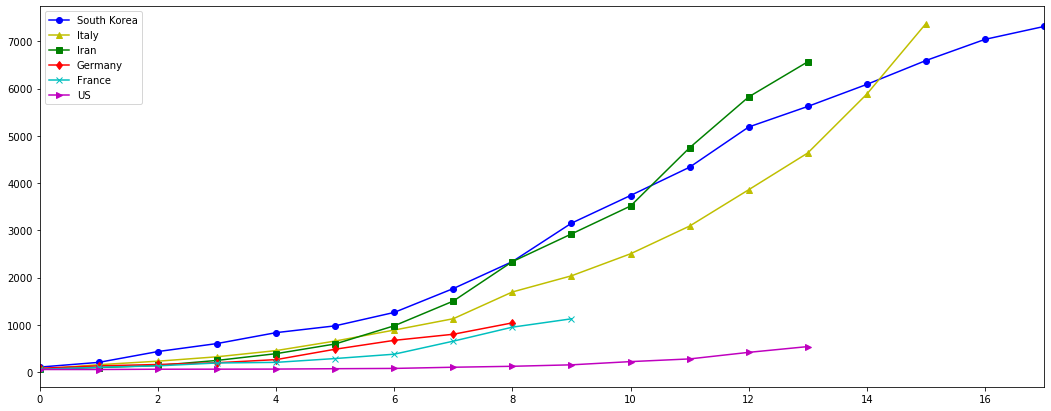

In [107]:

#plt.figure(figsize=(18,7), legend=True)
#plt.plot(df_country)
result = df_country[:25].plot(figsize=(18,7), logy=False, style=['bo-', 'y^-', 'gs-', 'rd-', 'cx-', 'm>-', 'k<-'])
#result.figure

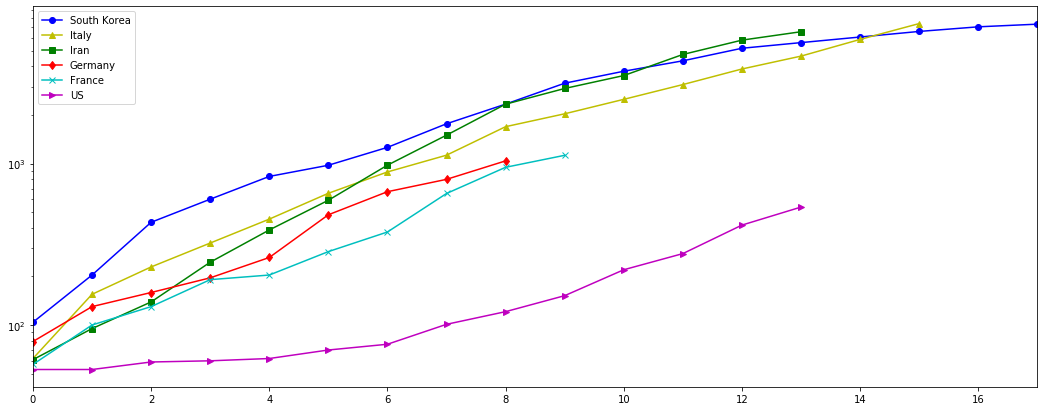

In [101]:
df_country[:21].plot(figsize=(18,7), logy=True, style=['bo-', 'y^-', 'gs-', 'rd-', 'cx-', 'm>-', 'k<-'])